In [7]:
import pandas as pd
import random
order_data= pd.read_csv('Simplified orders.csv')
order_data.shape  # to display number of rows and columns in the dataframe


(2387224, 10)

# Task 1:

In [12]:
order_data.DATETIME= pd.to_datetime(order_data.DATETIME)
def get_data (df, Student_ID):
    
    random.seed(Student_ID)
    del_row= random.sample(range(0,2387223), Student_ID) #to delete specific(Student_ID) number of rows from data
    temp_dataset= df.drop(del_row)
    dataset= temp_dataset
    new_dataset= dataset.reset_index()
    return new_dataset

Student_ID=1
df=order_data
my_dataset=get_data (df, Student_ID)
print(my_dataset)

#creating duplicate dataset to perform operations based on further tasks in assignment 
final_dataset=my_dataset

           index  ORDER_ID            DATETIME RESTAURANT_ID      TYPE  \
0              0  O1820060 2018-10-11 17:25:50        R10002  IN_STORE   
1              1  O1011112 2018-05-31 11:35:00        R10003  IN_STORE   
2              2   O752854 2018-04-21 18:12:57        R10001  DELIVERY   
3              3  O2076864 2018-11-17 12:50:52        R10005    PICKUP   
4              4  O1988898 2018-11-04 18:37:24        R10008  IN_STORE   
...          ...       ...                 ...           ...       ...   
2387218  2387219   O420721 2018-03-04 17:59:51        R10004  IN_STORE   
2387219  2387220  O1738792 2018-09-29 13:05:36        R10007    PICKUP   
2387220  2387221   O858342 2018-05-07 18:23:24        R10006  DELIVERY   
2387221  2387222  O2093417 2018-11-19 19:39:56        R10006  IN_STORE   
2387222  2387223   O718185 2018-04-16 19:25:01        R10001  IN_STORE   

         DRINKS  COOKIES MAIN BASE SIDE_1 SIDE_2  
0           1.0      2.0  NaN  NaN    NaN    NaN  
1        

In [19]:
print(min(final_dataset['DATETIME']))
print(max(final_dataset['DATETIME']))

2018-01-01 10:03:29
2018-12-31 22:57:15


# Task 2:

# To calculate total number of orders of each restaurant

In [18]:

final_dataset['WEEK_NUMBER']= final_dataset['DATETIME'].dt.isocalendar().week # to add one column with week number against each date
rest_orders_count_per_week=final_dataset.groupby(['RESTAURANT_ID','WEEK_NUMBER'])['ORDER_ID'].size().reset_index()
rest_orders_count_per_week.columns=['RESTAURANT_ID', 'WEEK_NUMBER', 'TOTAL_NUMBER_OF_ORDERS']
df_total_orders=rest_orders_count_per_week.groupby("RESTAURANT_ID").sum('TOTAL_NUMBER_OF_ORDERS').drop('WEEK_NUMBER',axis=1).reset_index()
print(df_total_orders)

  RESTAURANT_ID  TOTAL_NUMBER_OF_ORDERS
0        R10001                  250810
1        R10002                  325265
2        R10003                  227445
3        R10004                  430860
4        R10005                  281983
5        R10006                  275000
6        R10007                  281186
7        R10008                  314674


## Plotting number of orders of each week for restaurant 'R10001'

In [10]:

df_rest_R10001= final_dataset[final_dataset['RESTAURANT_ID']=='R10001'] #Creating dataset with details of Restaurant ID= R10001

df_rest_R10001['WEEK_NUMBER']=df_rest_R10001['DATETIME'].dt.isocalendar().week #adding column with week number against each date
rest_R10001_orders_week= df_rest_R10001.groupby(['WEEK_NUMBER'])['ORDER_ID'].size().reset_index() 
rest_R10001_orders_week.columns=['WEEK_NUMBER','NUMBER_OF_ORDERS']  # renaming columns
print(rest_R10001_orders_week)


    WEEK_NUMBER  NUMBER_OF_ORDERS
0             1              4132
1             2              4333
2             3              5024
3             4              5151
4             5              5273
5             6              5453
6             7              5518
7             8              5453
8             9              5523
9            10              5415
10           11              5310
11           12              5348
12           13              5446
13           14              5398
14           15              5276
15           16              5453
16           17              5352
17           18              4964
18           19              5034
19           20              5052
20           21              4868
21           22              4705
22           23              4668
23           24              4428
24           25              4183
25           26              3541
26           27              3444
27           28              3186
28           2

<AxesSubplot:title={'center':'Weekly orders for Restaurant- R10001 in 2018'}, xlabel='Week Number', ylabel='Number of Orders'>

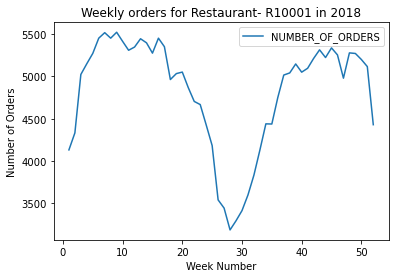

In [6]:
rest_R10001_orders_week.plot(kind='line', x='WEEK_NUMBER', y='NUMBER_OF_ORDERS', xlabel='Week Number', ylabel= 'Number of Orders', title= 'Weekly orders for Restaurant- R10001 in 2018')

# Plotting number of orders of each week for all restaurants

In [12]:
#to calculate total number of orders each week for each restaurant

final_dataset['WEEK_NUMBER']= final_dataset['DATETIME'].dt.isocalendar().week #to add one column with week numbers against each date
rest_orders_count_per_week=final_dataset.groupby(['RESTAURANT_ID','WEEK_NUMBER'])['ORDER_ID'].size().reset_index()
rest_orders_count_per_week.columns=['RESTAURANT_ID', 'WEEK_NUMBER', 'ORDERS_PER_WEEK']
print(rest_orders_count_per_week)



    RESTAURANT_ID  WEEK_NUMBER  ORDERS_PER_WEEK
0          R10001            1             4132
1          R10001            2             4333
2          R10001            3             5024
3          R10001            4             5151
4          R10001            5             5273
..            ...          ...              ...
411        R10008           48             6572
412        R10008           49             6330
413        R10008           50             6305
414        R10008           51             6553
415        R10008           52             6537

[416 rows x 3 columns]


In [25]:
import matplotlib.pyplot as plt

rest_list=sorted(final_dataset["RESTAURANT_ID"].unique().tolist()) # to create list of Restaurant IDs from given data
print(rest_list)


['R10001', 'R10002', 'R10003', 'R10004', 'R10005', 'R10006', 'R10007', 'R10008']


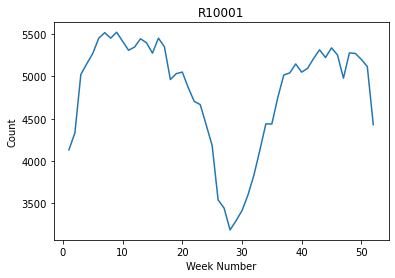

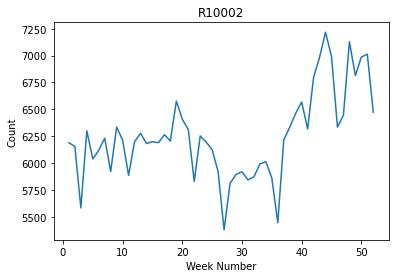

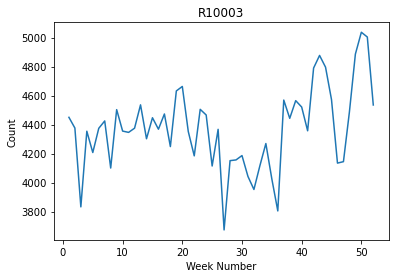

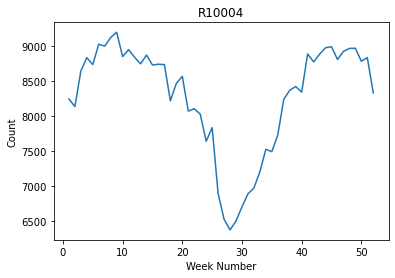

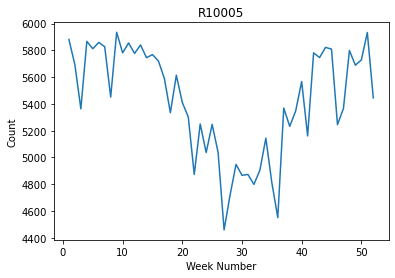

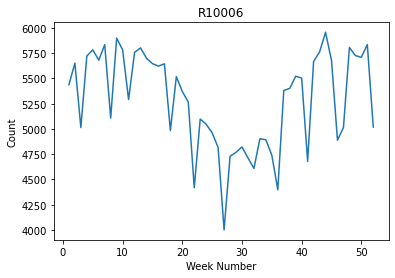

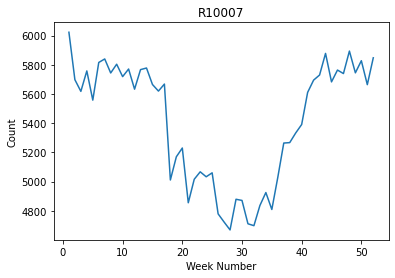

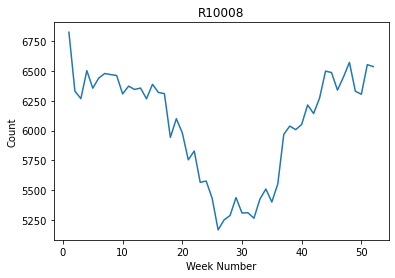

In [26]:
for i in rest_list:
    x= rest_orders_count_per_week[rest_orders_count_per_week['RESTAURANT_ID']==i]["WEEK_NUMBER"]
    y=rest_orders_count_per_week[rest_orders_count_per_week['RESTAURANT_ID']==i]['ORDERS_PER_WEEK']
    plt.xlabel('Week Number')
    plt.ylabel('Count')
    plt.title(i)
    plt.plot(x,y)
    plt.show()

## Insights :

## Task 3.1:

## Computing percent of each type of orders for Restaurant- R10001

In [29]:

R1_orders= final_dataset.loc[(final_dataset['RESTAURANT_ID']== 'R10001')] # dataframe with details of Restaurant- R10001

R1_orders_per_type= R1_orders.groupby(['TYPE']).size().reset_index()#to get the number of orders of each 'Type of Order' for Restaurant-R10001
R1_orders_per_type.columns=['TYPE', 'NUMBER_OF_ORDERS'] 

R1_orders_per_type['PERCENT']= (R1_orders_per_type['NUMBER_OF_ORDERS']/R1_orders_per_type['NUMBER_OF_ORDERS'].sum())*100 # calculating percentage of each order type from total number of orders of R10001
R1_orders_per_type

,TYPE,NUMBER_OF_ORDERS,PERCENT
0,DELIVERY,25247,10.066186
1,IN_STORE,182603,72.805311
2,PICKUP,42960,17.128504


## Computing percent of each type of orders for all Restaurants

In [16]:
rest_orders_count_per_type=final_dataset.groupby(['RESTAURANT_ID','TYPE'])['ORDER_ID'].count().reset_index()
rest_orders_count_per_type.columns=['RESTAURANT_ID', 'TYPE', 'TYPE_COUNT']   # renaming columns

#to calculate percentage of orders for each Restaurant ID
rest_orders_count_per_type1=rest_orders_count_per_type.groupby(['RESTAURANT_ID','TYPE']).agg({'TYPE_COUNT': 'sum'})
rest_orders_count_per_type1['PERCENT_OF_ORDERS']=rest_orders_count_per_type1.groupby(level=0).apply(lambda x:100*x/float(x.sum()))

rest_orders_count_per_type1.rename(columns={'TYPE_COUNT':'NUMBRER_OF_ORDERS'}, inplace=True)
df_rest_orders=rest_orders_count_per_type1.reset_index()
test_summary=df_rest_orders.set_index(['RESTAURANT_ID'])
test_summary


,TYPE,NUMBRER_OF_ORDERS,PERCENT_OF_ORDERS
RESTAURANT_ID,,,
R10001,DELIVERY,25247,10.066186
R10001,IN_STORE,182603,72.805311
R10001,PICKUP,42960,17.128504
R10002,DELIVERY,22380,6.880544
R10002,IN_STORE,244980,75.317049
R10002,PICKUP,57905,17.802407
R10003,DELIVERY,15613,6.864517
R10003,IN_STORE,171494,75.400207
R10003,PICKUP,40338,17.735277


## Task 3.2 

## Function to calculate revenue of on sales of drinks and cookies

In [32]:

def cal_revenue (df,REST_ID):
    df_rest=df.loc[(df['RESTAURANT_ID']==REST_ID)]
    df_rest
    drinks_revenue=(df_rest['DRINKS'].sum())*3.80
    print('Revenue generated from sale of Drinks:{0}'. format(drinks_revenue))
    cookies_revenue=(df_rest['COOKIES'].sum())*1.20
    print('Revenue generated from sale of Cookies:{0}'. format(cookies_revenue))
    total_revenue= drinks_revenue + cookies_revenue
    print('Total revenue generated from sale of Drinks and Cookies:{0}'. format(total_revenue))
    return total_revenue


df=final_dataset
REST_ID= 'R10001'
revenue=cal_revenue(df, REST_ID)
revenue

Revenue generated from sale of Drinks:63448.6
Revenue generated from sale of Cookies:77966.4
Total revenue generated from sale of Drinks and Cookies:141415.0


141415.0

## Task 4 :

## Designing menu to maximize profit factoring constraints

In [17]:

df_R10001=final_dataset[final_dataset['RESTAURANT_ID']=='R10001']
#df_rest=final_dataset.loc[(df['RESTAURANT_ID']=='R10001')]

#computing number of respective item in all orders for Restaurant-R10001

n_drinks=df_R10001['DRINKS'].sum()

n_cookies=df_R10001['COOKIES'].sum()

n_main=df_R10001['MAIN'].count()

n_base=df_R10001['BASE'].count()

n_side1=df_R10001['SIDE_1'].count()

n_side2=df_R10001['SIDE_2'].count()


from pulp import *

#defining LP Problem
menuProb= LpProblem("Restaurant_Menu",LpMaximize)

#defining variables for problem
#d= LpVariable(name='p_drinks', lowBound=2,upBound=4)
p_drinks= LpVariable(name='p_drinks', lowBound=0)
p_cookies= LpVariable(name='p_cookies', lowBound=0)
p_main= LpVariable(name='p_main', lowBound=0)
p_base= LpVariable(name='p_base', lowBound=0)
p_side1= LpVariable(name='p_side1', lowBound=0)
p_side2= LpVariable(name='p_side2', lowBound=0)

#defining constraints for problem
menuProb+=((p_drinks+p_cookies+p_main+p_base+p_side1+p_side2)<=30)
menuProb+=(p_drinks>=2)
menuProb+=(p_drinks<=4)
menuProb+=(p_cookies>=0.5)
menuProb+=(p_cookies<=1.5)
menuProb+=(p_main>=8)
menuProb+=(p_main<=25)
menuProb+=(p_base>=1)
menuProb+=(p_base<=3)
menuProb+=(p_side1>=1)
menuProb+=(p_side1<=2.5)
menuProb+=(p_side2>=1.5)
menuProb+=(p_side2<=3)

#Objective function
menuProb+= lpSum([n_drinks*p_drinks, n_cookies*p_cookies, n_main*p_main, n_base*p_base, n_side1*p_side1, n_side2*p_side2])

opt_soln=menuProb.solve()

opt_soln

for var in menuProb.variables():
    print(f"{var.name}: {var.value()}")
    
print(f"objective_value:{menuProb.objective.value()}")

print(f"status: {menuProb.status}, {LpStatus[menuProb.status]}")


p_base: 1.0
p_cookies: 0.5
p_drinks: 2.0
p_main: 24.0
p_side1: 1.0
p_side2: 1.5
objective_value:6649545.0
status: 1, Optimal
